<a href="https://colab.research.google.com/github/ankit-chuahan/Air_bnb_project/blob/main/Laliga_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laliga 2022

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
file_path = "/content/new_lalaiga_2022.csv"
laliga = pd.read_csv(file_path)

In [ ]:
laliga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player Name  542 non-null    object 
 1   Team-name    542 non-null    object 
 2   Age          542 non-null    int64  
 3   Position     542 non-null    object 
 4   App          541 non-null    float64
 5   MinP         542 non-null    int64  
 6   Goals        216 non-null    float64
 7   Assist       206 non-null    float64
 8   YC           394 non-null    float64
 9   RC           92 non-null     float64
 10  SPG          440 non-null    float64
 11  PS%          542 non-null    object 
 12  AW           456 non-null    float64
 13  MOTM         151 non-null    float64
 14  Rating       542 non-null    float64
dtypes: float64(9), int64(2), object(4)
memory usage: 63.6+ KB


In [ ]:
laliga.describe()

,Age,App,MinP,Goals,Assist,YC,RC,SPG,AW,MOTM,Rating
count,542.000000,541.000000,542.000000,216.000000,206.000000,394.000000,92.000000,440.000000,456.000000,151.000000,542.000000
mean,26.843173,10.020333,897.415129,2.652778,1.932039,3.134518,1.108696,0.808864,0.887061,1.629139,6.477675
std,4.704124,7.823845,663.629943,2.512257,1.207797,1.997371,0.376698,0.634748,0.732831,1.080839,0.311721
min,17.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,0.100000,1.000000,4.630000
25%,23.000000,2.000000,280.500000,1.000000,1.000000,1.000000,1.000000,0.400000,0.400000,1.000000,6.252500
50%,27.000000,9.000000,862.500000,2.000000,2.000000,3.000000,1.000000,0.600000,0.700000,1.000000,6.490000
75%,30.000000,16.000000,1445.250000,3.000000,2.000000,4.000000,1.000000,1.025000,1.200000,2.000000,6.670000
max,41.000000,25.000000,2250.000000,15.000000,8.000000,10.000000,3.000000,4.700000,5.600000,7.000000,7.530000


In [ ]:
laliga.isnull().sum()

Player Name      0
Team-name        0
Age              0
Position         0
App              1
MinP             0
Goals          326
Assist         336
YC             148
RC             450
SPG            102
PS%              0
AW              86
MOTM           391
Rating           0
dtype: int64

In [ ]:
laliga.columns

Index(['Player Name', 'Team-name', 'Age', 'Position', 'App', 'MinP', 'Goals',
       'Assist', 'YC', 'RC', 'SPG', 'PS%', 'AW', 'MOTM', 'Rating'],
      dtype='object')

In [3]:
avg_ = laliga['SPG'].mean()
avg_spg = round(avg_,2)
avg_spg

0.81

In [4]:
laliga[['Goals', 'Assist', 'YC', 'RC','MOTM','AW']] = laliga[['Goals', 'Assist', 'YC', 'RC','MOTM','AW']].fillna(0)
laliga['SPG'].fillna(avg_spg ,inplace =True)
laliga.dropna(inplace =True)



In [ ]:
laliga.isnull().sum()

Player Name    0
Team-name      0
Age            0
Position       0
App            0
MinP           0
Goals          0
Assist         0
YC             0
RC             0
SPG            0
PS%            0
AW             0
MOTM           0
Rating         0
dtype: int64

In [5]:
laliga.rename(columns = {'SPG':'shot_per_game' , 'AW' :'Away_match' , 'Team-name' : 'Team_name','PS%' :'Passsing_percent'},inplace = True)

In [ ]:
laliga['Position'].unique()

array(['  FW', '   FW', '   AM', '   M', '   DMC', '   GK', 'DMC', '   D',
       '   Defender', '   Goalkeeper', '   Midfielder', '   Forward',
       '   DMC M'], dtype=object)

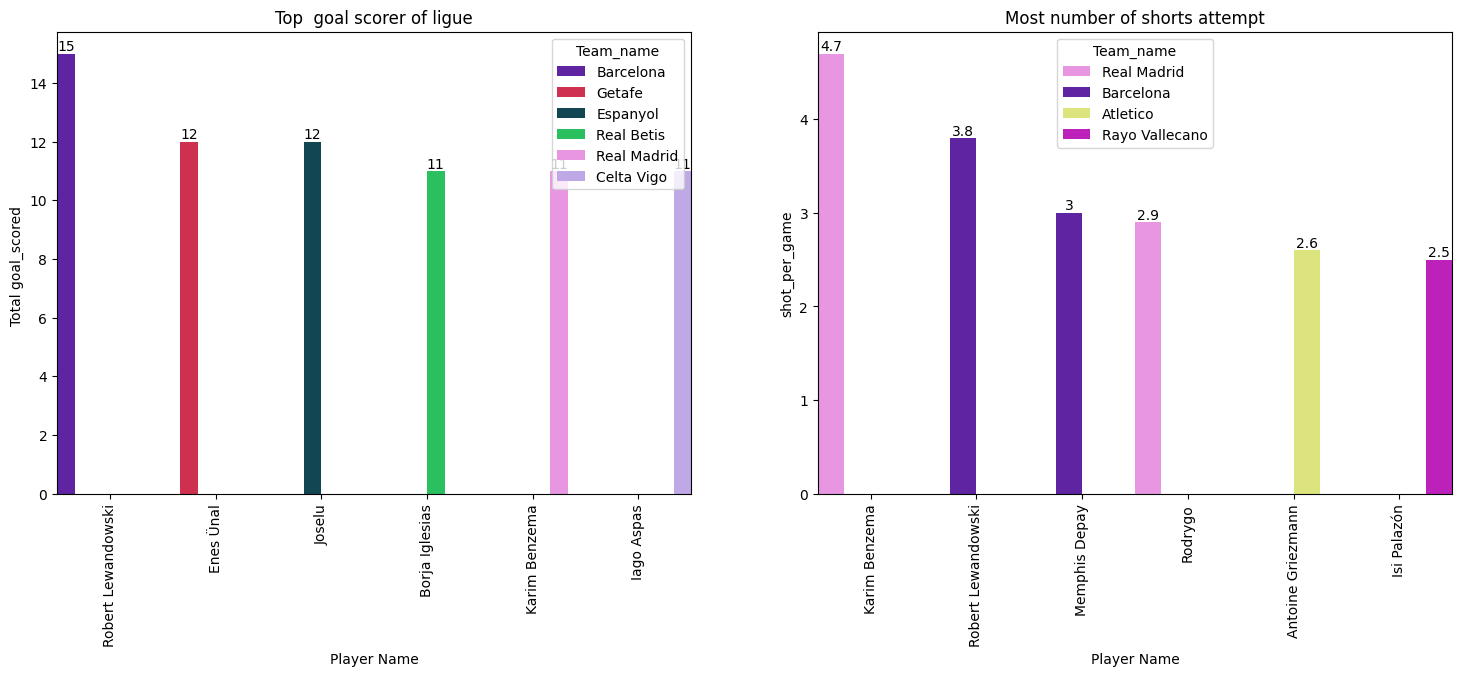

In [ ]:
# 1

# who are the top 6 goal scorer
top_6 = laliga[["Team_name","Player Name",'Goals']].sort_values("Goals" ,ascending = False).reset_index().head(6)
top_6

plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
color = ['#5E0FB7','#E8163F','#064D5D' ,'#11D957','#F688EE','#BB9DF1']
neww= sns.barplot(x = top_6['Player Name'] ,y =top_6['Goals'] ,palette=color,hue=top_6['Team_name'],width=1)
for bars in neww.containers:
    neww.bar_label(bars,label_type='edge')

plt.xticks(rotation=90)
plt.ylabel('Total goal_scored ')
plt.title("Top  goal scorer of ligue")

# Which  player has most number of shots per match

most_shot = laliga[["Player Name",'shot_per_game','Team_name']].sort_values("shot_per_game" ,ascending = False).reset_index().head(6)
most_shot
plt.subplot(1,2,2)
color = ['#F688EE','#5E0FB7','#EBF56C' ,'#D607D3','#09ECF7','#2A9DEE']
new_1 = sns.barplot(x =most_shot['Player Name'] ,y =most_shot['shot_per_game'],palette=color,hue=most_shot['Team_name'],width=1)
for bars in new_1.containers:
   new_1.bar_label(bars,label_type='edge')
plt.xticks(rotation=90)
plt.title("Most number of shorts attempt")
plt.show()

Only karim benzema and robert lewandowski are player who has most number of shots per match and they are scoring goals from those shots other players like depay and griezmann has shot alot but they are not managing to score goals and similary enes and joselu has not take alot of shot but still managed to score goal.Real madrid and Barcelona player taken most number of shots

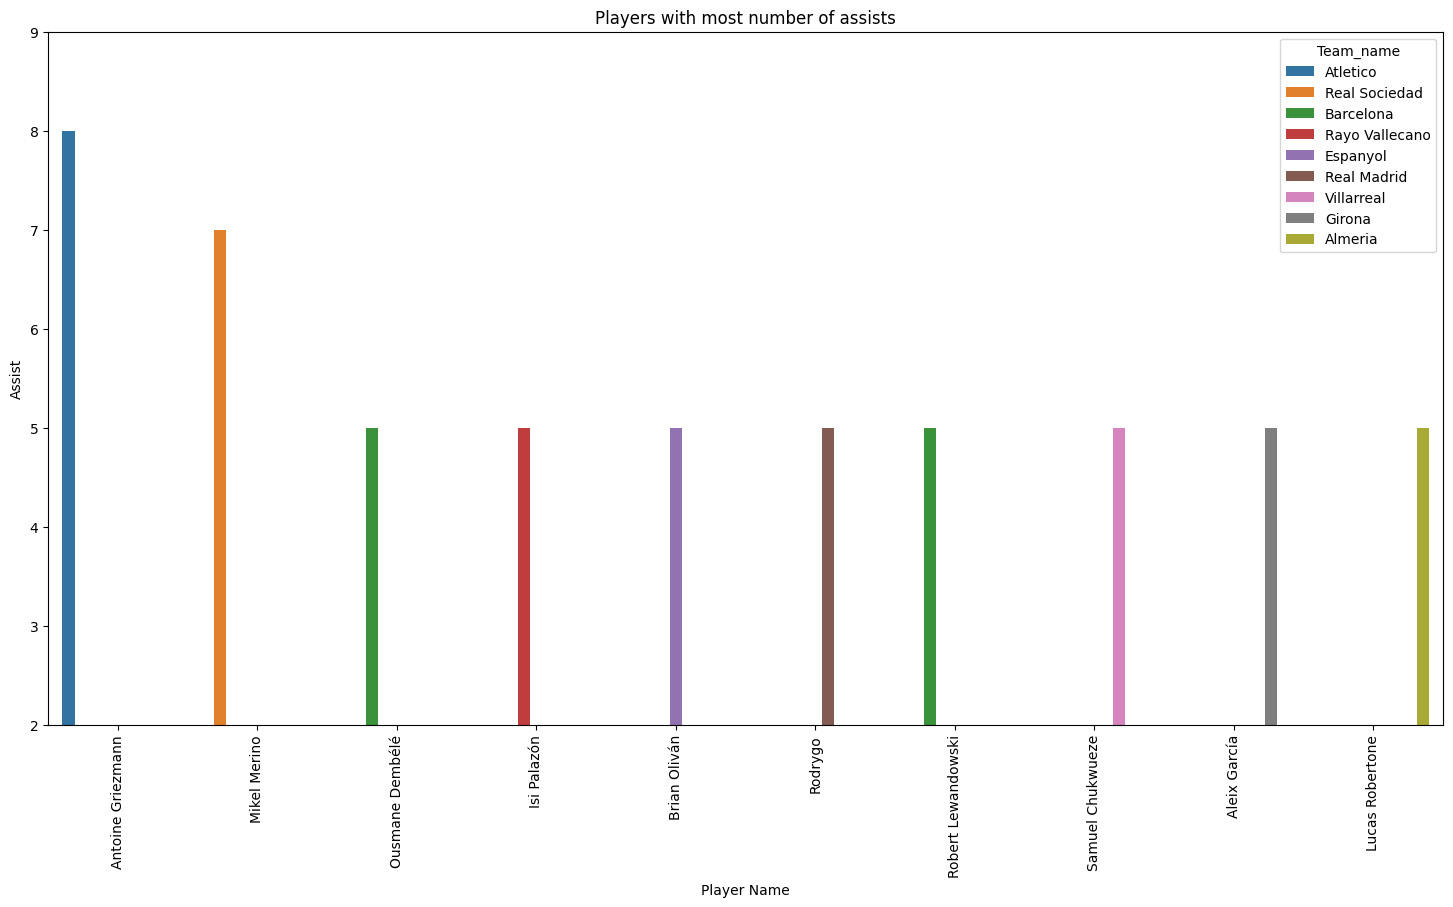

In [16]:
# 2.

# Who has the best passing accuracy of all and who provide most assists
plt.figure(figsize=(18,9))
team = laliga.groupby(['Player Name','Team_name'])['Assist'].sum().reset_index().sort_values('Assist',ascending =False)[:10]
team
sns.barplot(x='Player Name',y='Assist',data = team,hue='Team_name',)
plt.xticks(rotation=90)
plt.title('Players with most number of assists')
plt.ylim(2,9)
plt.show()

We can clearly see that Griezmann and mikel provide most number of assists . Asists are very important for teams to score goals

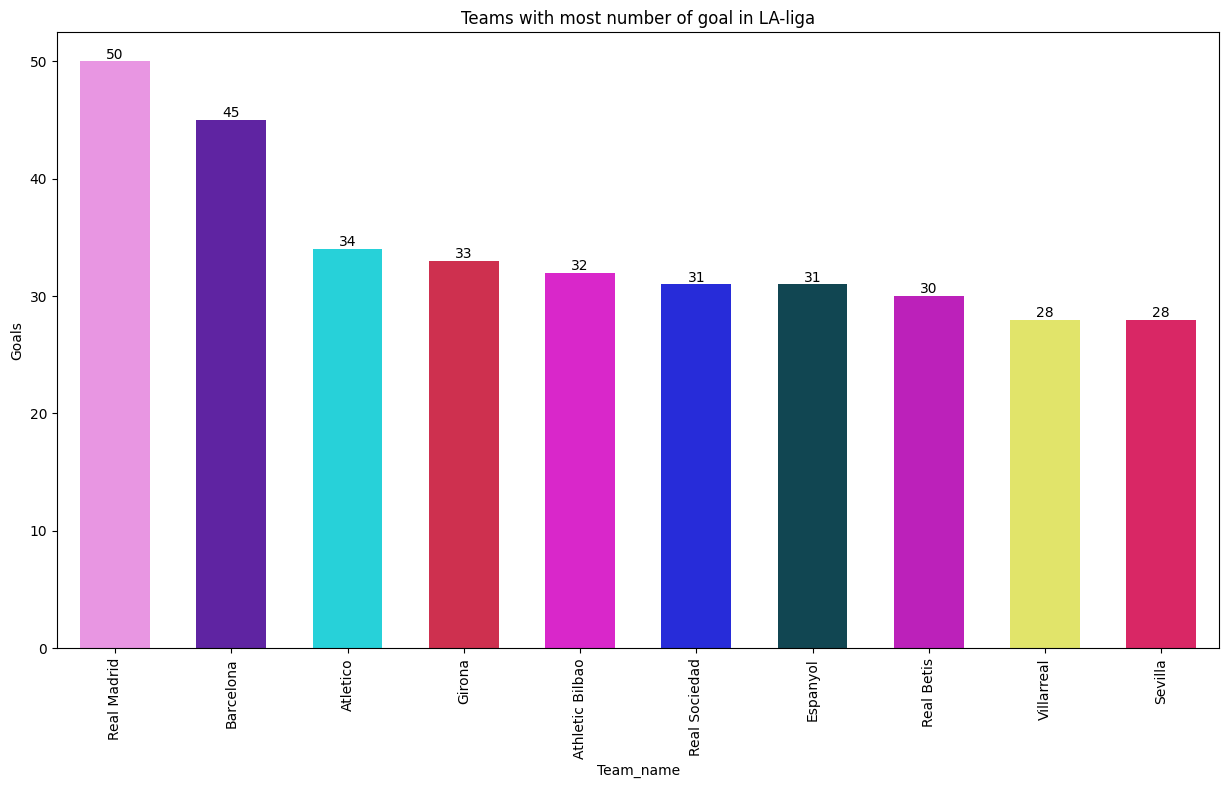

In [17]:
# 3.

# which team scored the most number of goals
plt.figure(figsize=(15,8))
team = laliga.groupby('Team_name')['Goals'].sum().reset_index().sort_values('Goals',ascending =False)[:10]
team
color = ['#F688EE','#5E0FB7','#09ECF7' ,'#E8163F','#F709E2','#0910F7','#064D5D','#D607D3','#F4F955','#F7095C']

neww= sns.barplot(x = team['Team_name'] ,y =team['Goals'],palette =color ,width = 0.6)
plt.xticks(rotation=90)
neww.bar_label(neww.containers[0])
plt.title('Teams with most number of goal in LA-liga')
plt.show()

Real madrid and Barcelona are two giants  of Laliga as we can see that they have score lots of goals as we  see player from both team are in list of top goal scorer and asists provider

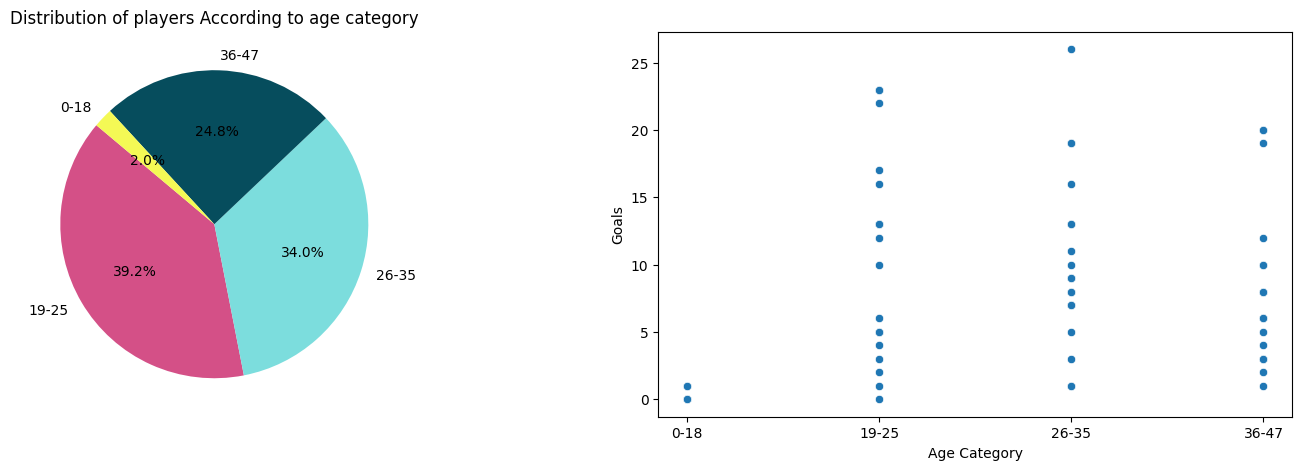

In [20]:
# 4.
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
bins = [0, 18, 25, 30, 45]
labels = ['0-18', '19-25', '26-35','36-47' ]
laliga['Age Category'] = pd.cut(laliga['Age'], bins=bins, labels=labels)
age_category_counts = laliga['Age Category'].value_counts()
age_category_counts
color = ["#d45087","#7CDDDD",'#064D5D','#F4F955']

plt.pie(age_category_counts, labels=age_category_counts.index, autopct='%1.1f%%', startangle=140,colors =color,)
plt.title ('Distribution of players According to age category')



plt.subplot(1,2,2)
ageee = laliga.groupby(['Age Category','Team_name'])["Goals"].sum().reset_index()
sns.scatterplot(x='Age Category' , y='Goals',data=ageee,)

plt.show()

Most number of the player  lie in range of 19-30 and most goal scorer  lie in the same which is very good for future of laliga and clubs because they can provide there service for long time and even in market the other club are willing to pay higher amount for younger player.

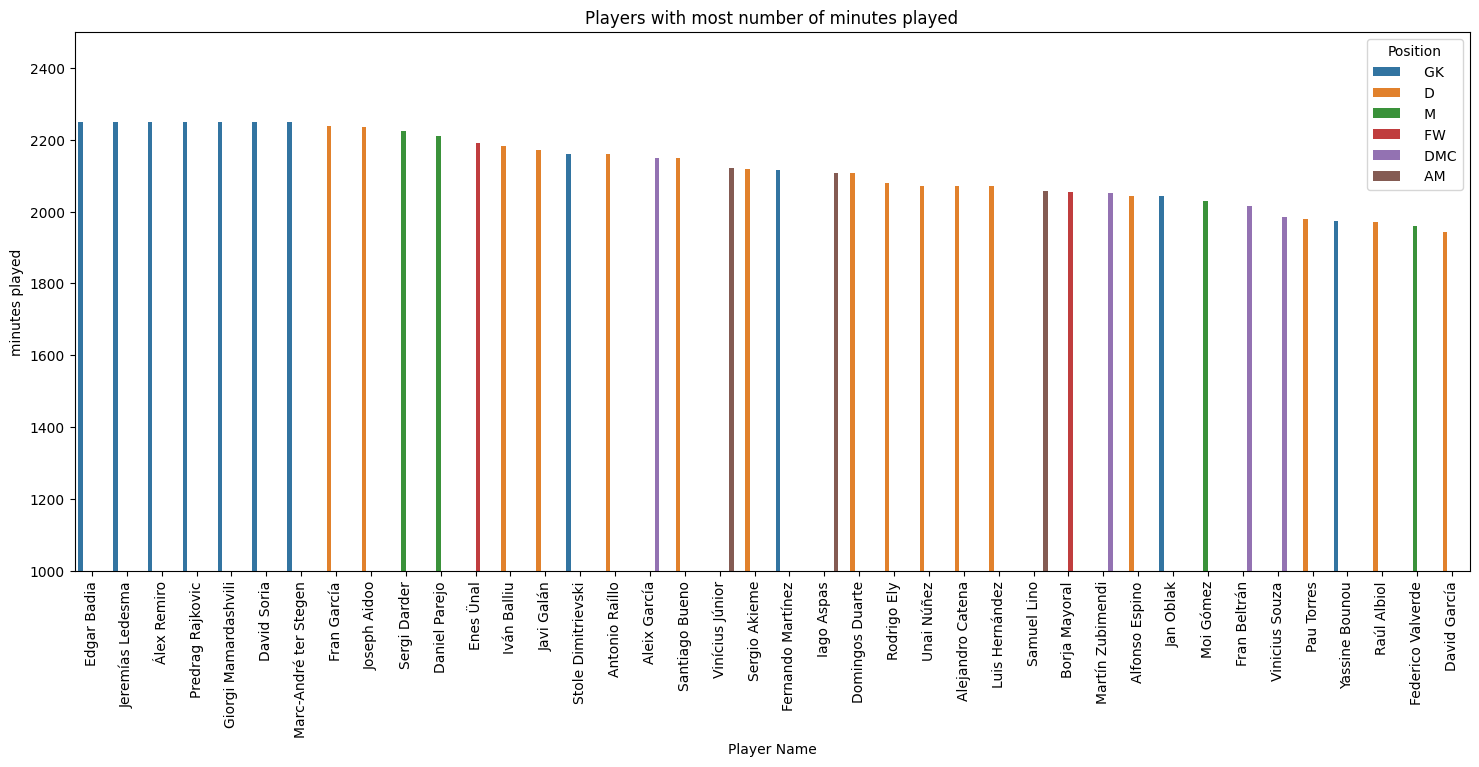

In [23]:
# which player played most number of minutes

plt.figure(figsize=(18,7))
minutes = laliga[["Player Name","MinP",'Goals','Position']].reset_index().sort_values('MinP',ascending=False).reset_index().head(40)
plt.xticks(rotation=90)


sns.barplot(x= minutes["Player Name"] , y = minutes["MinP"] ,hue =minutes['Position'])
plt.legend(title='Position', loc='upper right')
plt.ylim(1000,2500)
plt.title('Players with most number of minutes played')
plt.ylabel('minutes played')
plt.show()

From the above chart we can see that player who plays most minutes are either defender or goalkeepers and we can rearly see forward and midfielders there

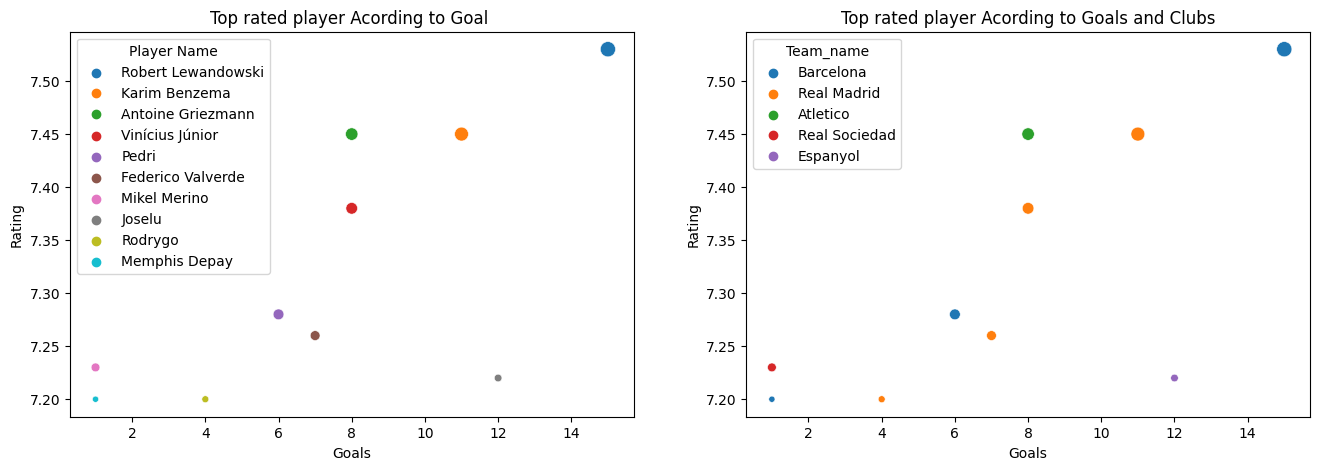

In [ ]:
# top rated player over the season
plt.figure(figsize=(16,5))
top_player = laliga[["Team_name","Player Name",'Rating','Goals']].sort_values('Rating' ,ascending=False).head(10)
top_player
plt.subplot(1,2,1)
size =[120,100,80,70,60,50,40,30,25,20]
sns.scatterplot(x='Goals' , y='Rating',data=top_player,hue='Player Name',s=size)
plt.title("Top rated player Acording to Goal ")


plt.subplot(1,2,2)
size =[120,100,80,70,60,50,40,30,25,20]
sns.scatterplot(x='Goals' , y='Rating',data=top_player,hue='Team_name',s=size)
plt.title("Top rated player Acording to Goals and Clubs")
plt.show()

From the above chart we can see the most of the top rated players are either from Real madrid or from Barcelona .

And the best player of laliga according to the data is Robert Lewandowski follow by Karim Benzema and soo on

we can clearly see that player who scored more goals getting higher rating.that means to get the highest rating player should score lots of goal

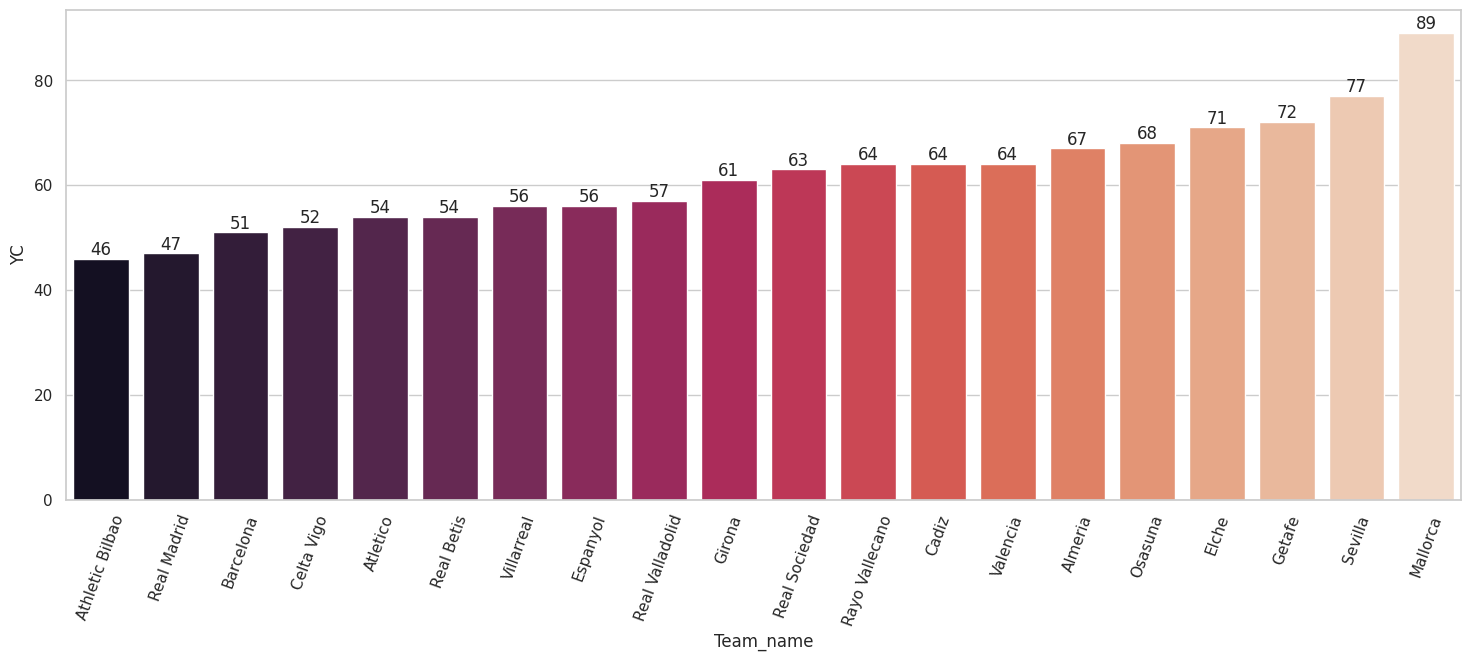

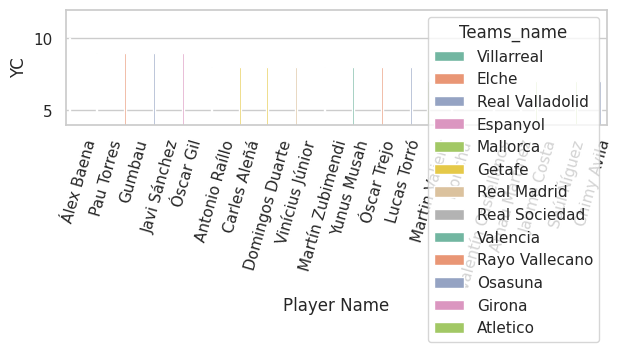

In [ ]:
plt.figure(figsize=(18,14))
plt.subplot(2,1,1)
yellow = laliga.groupby('Team_name')[['YC']].sum().sort_values('YC' ,ascending =True).reset_index()
x=sns.barplot(x= 'Team_name' , y ='YC',data=yellow,palette="rocket")
x.bar_label(x.containers[0])
plt.xticks(rotation=70)
plt.show()


plt.subplot(2,1,2)
# plt.figure(figsize=(18,7))
player_yellow = laliga.groupby(['Player Name','Team_name'])[['YC']].sum().sort_values('YC' ,ascending=False).reset_index()[:20]
sns.barplot(x='Player Name' ,y ='YC',data=player_yellow,hue='Team_name',palette='Set2')
plt.legend(title='Teams_name', loc='upper right')
plt.xticks(rotation=74)
plt.ylim(4,12)
plt.tight_layout()
plt.show()
# RED = laliga.groupby('Team_name')[['RC']].sum().sort_values('RC' ,ascending =False).reset_index()
# RED



In [ ]:
laliga

,Player Name,Team_name,Age,Position,App,MinP,Goals,Assist,YC,RC,shot_per_game,Passsing_percent,Away_match,MOTM,Rating,Age Category
0,Robert Lewandowski,Barcelona,34,FW,20.0,1682,15.0,5.0,0.0,1.0,3.80,79,1.6,7.0,7.53,36-47
1,Karim Benzema,Real Madrid,35,FW,15.0,1306,11.0,3.0,1.0,0.0,4.70,87,0.7,4.0,7.45,36-47
2,Antoine Griezmann,Atletico,31,AM,18.0,1693,8.0,8.0,0.0,0.0,2.60,81.5,0.8,5.0,7.45,36-47
3,Vinícius Júnior,Real Madrid,22,AM,24.0,2122,8.0,4.0,8.0,0.0,2.50,82.3,0.0,4.0,7.38,19-25
4,Pedri,Barcelona,20,AM,18.0,1634,6.0,0.0,2.0,0.0,0.80,88.5,0.0,3.0,7.28,19-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,Carlos Álvarez,Sevilla,19,Midfielder,0.0,9,0.0,0.0,1.0,0.0,0.81,100,0.0,0.0,5.89,19-25
538,Tomás Alarcón,Cadiz,24,DMC,2.0,222,0.0,0.0,0.0,1.0,0.50,84.3,0.8,0.0,5.82,19-25
539,Álvaro Giménez,Cadiz,31,FW,0.0,16,0.0,0.0,0.0,0.0,0.81,100,0.0,0.0,5.82,36-47
540,John Donald,Elche,22,D,2.0,151,0.0,0.0,0.0,1.0,0.81,87.5,0.7,0.0,5.71,19-25


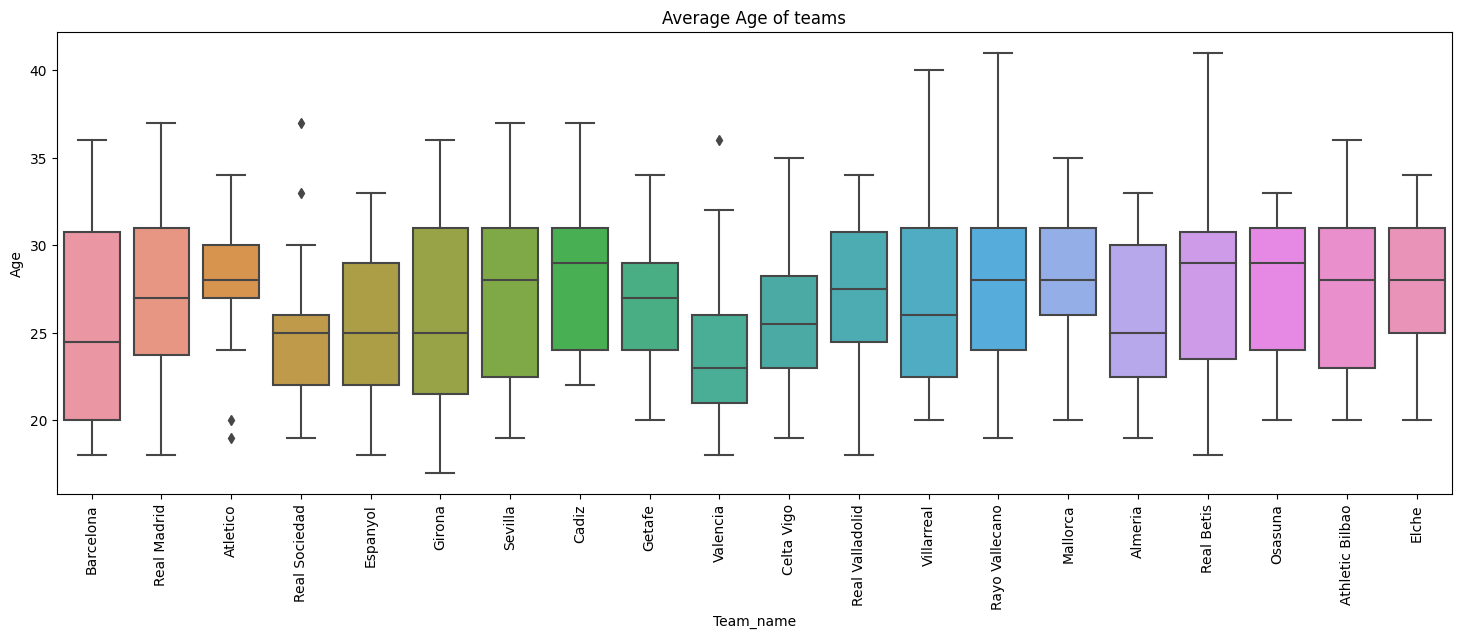

In [24]:
plt.figure(figsize=(18,6))
sns.boxplot(x='Team_name' , y='Age' ,data=laliga )
plt.xticks(rotation=90)
plt.title('Average Age of teams')
plt.show()

In [ ]:
laliga['Goals'].sum()
laliga['Assist'].sum()dodge=0.7

397.0

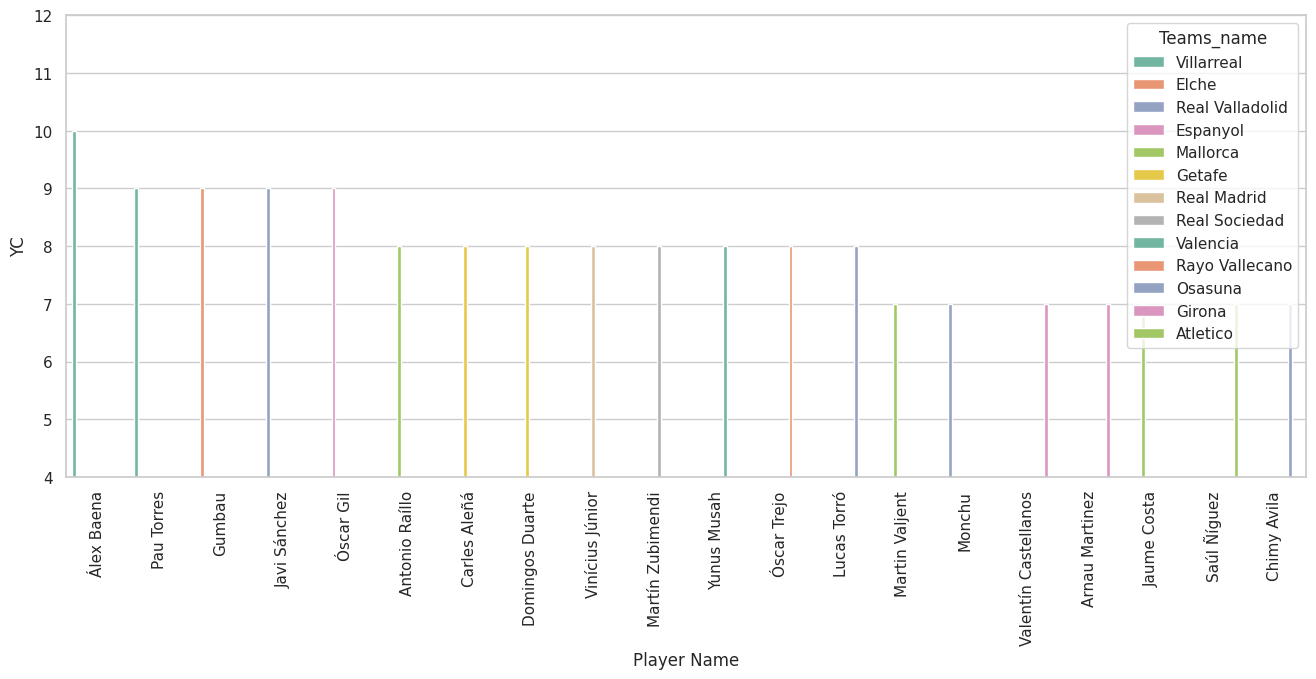

In [ ]:
plt.figure(figsize=(16,6))
player_yellow = laliga.groupby(['Player Name','Team_name'])[['YC']].sum().sort_values('YC' ,ascending=False).reset_index()[:20]
sns.barplot(x='Player Name' ,y ='YC',data=player_yellow,hue='Team_name',palette='Set2')
plt.legend(title='Teams_name', loc='upper right')
plt.xticks(rotation=90)
plt.ylim(4,12)
plt.show()

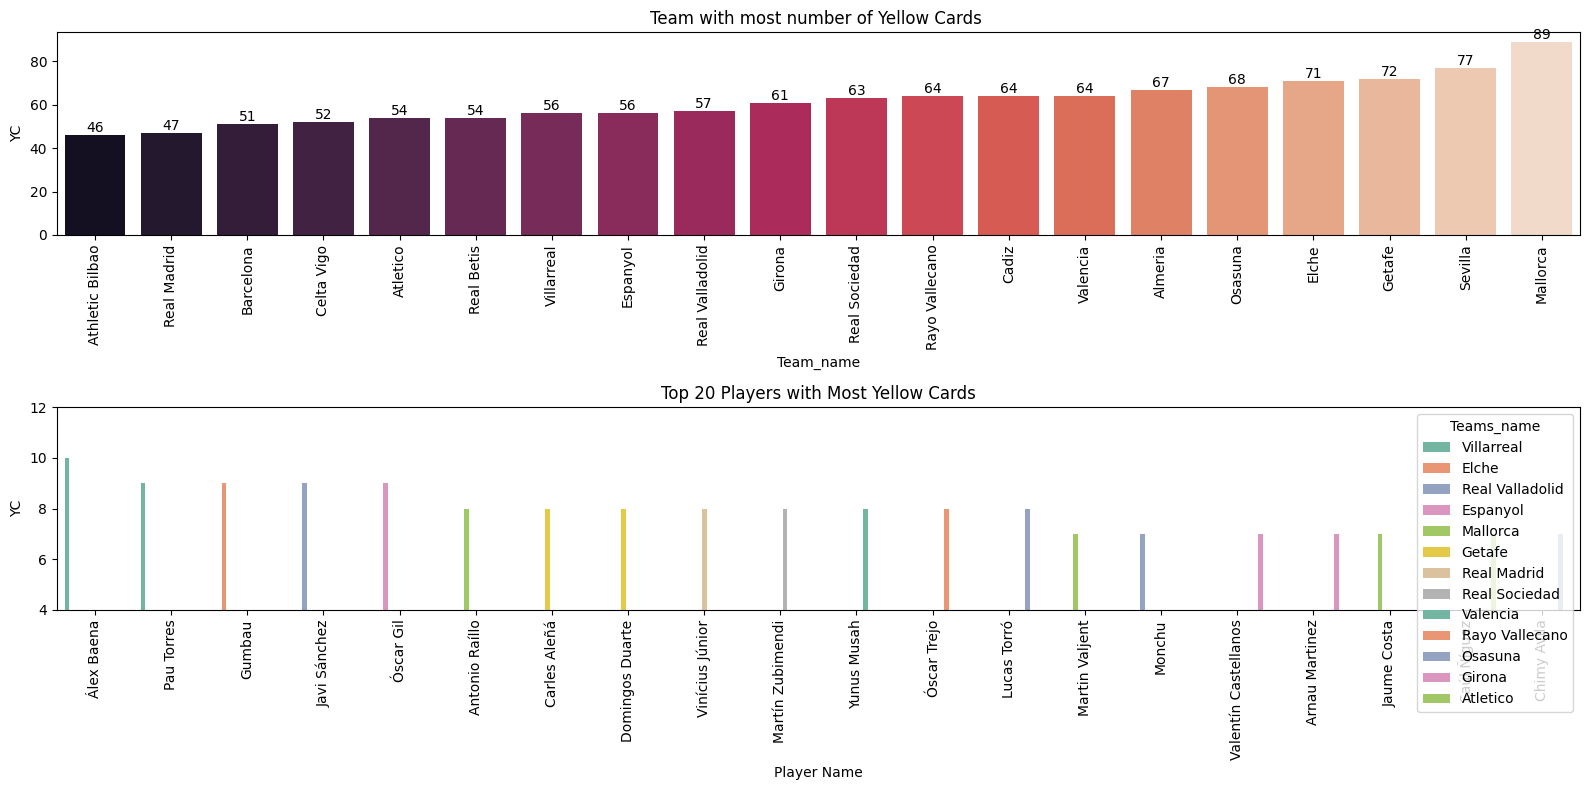

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 8))  # Adjust the figure size

# First Subplot
plt.subplot(2, 1, 1)
yellow = laliga.groupby('Team_name')[['YC']].sum().sort_values('YC', ascending=True).reset_index()
x = sns.barplot(x='Team_name', y='YC', data=yellow, palette="rocket")
x.bar_label(x.containers[0])
plt.xticks(rotation=90)
plt.title("Team with most number of Yellow Cards ")  # Add a title for the first subplot

# Second Subplot
plt.subplot(2, 1, 2)
player_yellow = laliga.groupby(['Player Name', 'Team_name'])[['YC']].sum().sort_values('YC', ascending=False).reset_index()[:20]
sns.barplot(x='Player Name', y='YC', data=player_yellow, hue='Team_name', palette='Set2')
plt.legend(title='Teams_name', loc='upper right')
plt.xticks(rotation=90)
plt.ylim(4, 12)
plt.title("Top 20 Players with Most Yellow Cards")  # Add a title for the second subplot

plt.tight_layout()  # Ensure subplots don't overlap
plt.show()
